In [1]:
import torch
import torchvision
from vit_shapley.CIFAR_10_Dataset import CIFAR_10_Datamodule

datamodule = CIFAR_10_Datamodule()
datamodule.setup()
data = next(iter(datamodule.train_dataloader()))

Files already downloaded and verified
Files already downloaded and verified


In [2]:
print(data.keys())

dict_keys(['images', 'labels', 'masks'])


In [3]:
print(f"images shape is {data['images'].shape}, \nmasks shape is {data['masks'].shape}")

images = data['images']
masks = data['masks']


images shape is torch.Size([32, 3, 224, 224]), 
masks shape is torch.Size([32, 2, 196])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


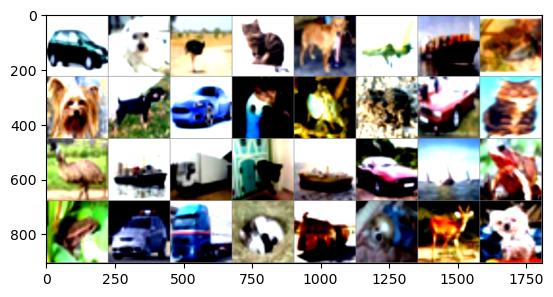

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, label=None):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    # plt.title(classes[label])
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# print images
imshow(torchvision.utils.make_grid(images))

In [25]:
# masks from dataloader have to be interleaved like in surrogate.py

print(f'masks shape is {masks.shape}')
masks_ = masks[:,0].reshape(-1, 14, 14)
masks_ = torch.repeat_interleave(torch.repeat_interleave(masks_, 16, dim=2), 16, dim=1)

print(f'images shape is {images.shape}, masks shape is {masks_.shape}')
images_masked = images * masks_.unsqueeze(1)

masks shape is torch.Size([32, 2, 196])
images shape is torch.Size([32, 3, 224, 224]), masks shape is torch.Size([32, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


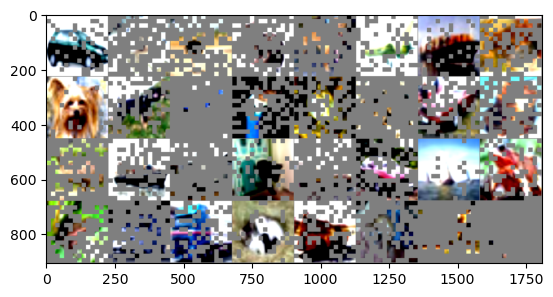

In [26]:
imshow(torchvision.utils.make_grid(images_masked))

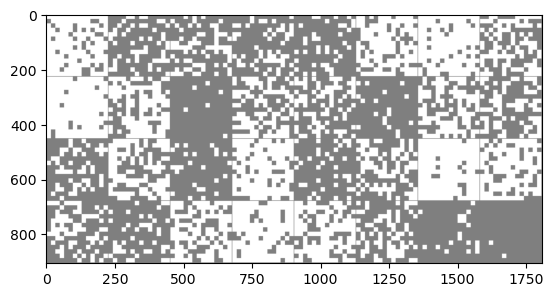

In [27]:
imshow(torchvision.utils.make_grid(masks_.unsqueeze(1)))

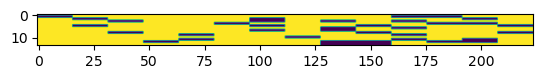

In [34]:
masks_2 = masks[:,0].reshape(-1, 14, 14)
# masks_2 = torch.repeat_interleave(torch.repeat_interleave(masks_2, 16, dim=2), 16, dim=1)
masks_2 = torch.repeat_interleave(masks_2, 16, dim=2)
masks_2.shape
# imshow(torchvision.utils.make_grid(masks_2[0]))
imshow(masks_2[0].unsqueeze(0))

In [28]:
masks_.shape

torch.Size([32, 224, 224])